<div style="background-color: green; color: white; padding: 10px; border-radius: 5px; text-align: center; font-size: 20px;">
    Telco Churn
</div>

<img src="https://media.licdn.com/dms/image/v2/D4D12AQH_uotGaS_FRA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1692599958742?e=2147483647&v=beta&t=JVLZwxiQmLyYItGZh7u_oZ1zscrNvkzkXtCR9dK-0v0" alt="Customer Churn" style="display: block; margin: auto; width: 60%;">

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Business Problem</title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Business Problem</h1>
        <p style="font-size: 14px; color: #000000; margin: 10px 0 5px;">
            It is desired to develop a machine learning model that can predict customers who will leave the company.
        </p>
    </div>
</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Dataset Story</h1>
        <p style="font-size: 14px; color: #000000; margin: 10px 0 5px;">
            The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
        </p>
    </div>
</body>
</html>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)

In [4]:
df_ = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df_.copy()
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Exploratory Data Analysis</h1>
    </div>
</body>
</html>


In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Info #####################")
    print(dataframe.info())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [6]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non

In [7]:
# correction of variable types
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors='coerce')
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# control
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    #num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


        gender  Ratio
gender               
Male      3555  50.48
Female    3488  49.52
##########################################


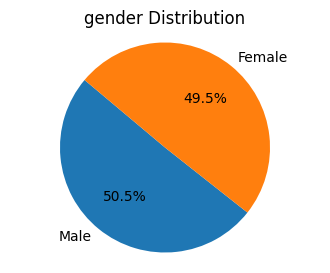

         Partner  Ratio
Partner                
No          3641  51.70
Yes         3402  48.30
##########################################


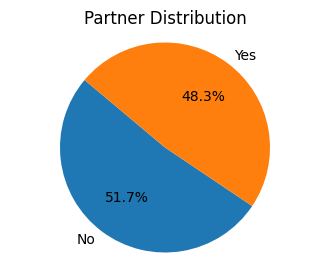

            Dependents  Ratio
Dependents                   
No                4933  70.04
Yes               2110  29.96
##########################################


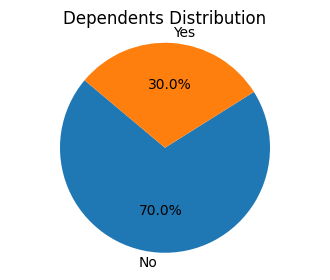

              PhoneService  Ratio
PhoneService                     
Yes                   6361  90.32
No                     682   9.68
##########################################


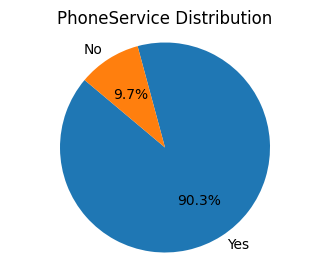

                  MultipleLines  Ratio
MultipleLines                         
No                         3390  48.13
Yes                        2971  42.18
No phone service            682   9.68
##########################################


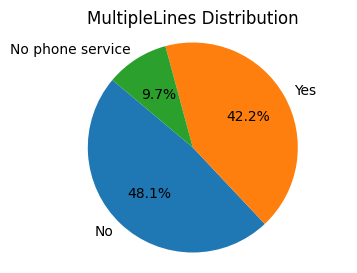

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096  43.96
DSL                         2421  34.37
No                          1526  21.67
##########################################


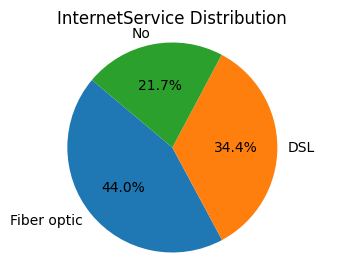

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498  49.67
Yes                            2019  28.67
No internet service            1526  21.67
##########################################


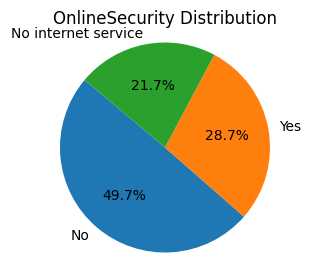

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088  43.84
Yes                          2429  34.49
No internet service          1526  21.67
##########################################


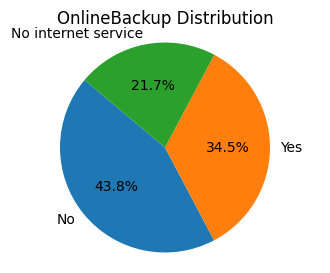

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095  43.94
Yes                              2422  34.39
No internet service              1526  21.67
##########################################


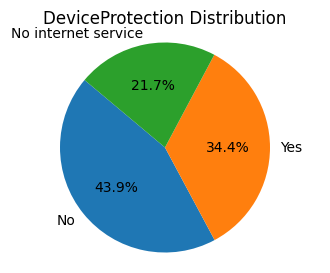

                     TechSupport  Ratio
TechSupport                            
No                          3473  49.31
Yes                         2044  29.02
No internet service         1526  21.67
##########################################


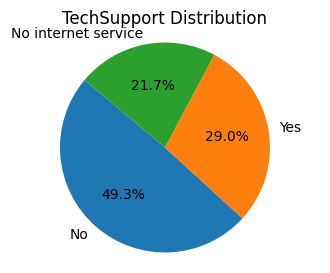

                     StreamingTV  Ratio
StreamingTV                            
No                          2810  39.90
Yes                         2707  38.44
No internet service         1526  21.67
##########################################


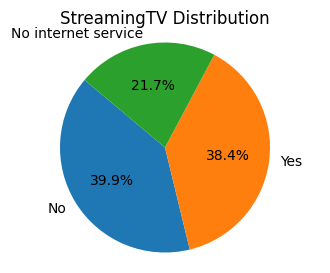

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785  39.54
Yes                             2732  38.79
No internet service             1526  21.67
##########################################


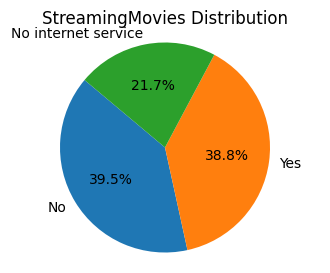

                Contract  Ratio
Contract                       
Month-to-month      3875  55.02
Two year            1695  24.07
One year            1473  20.91
##########################################


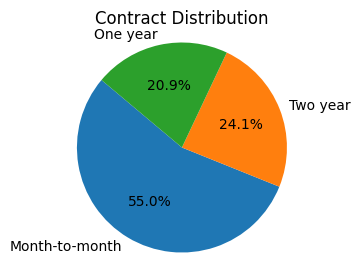

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171  59.22
No                            2872  40.78
##########################################


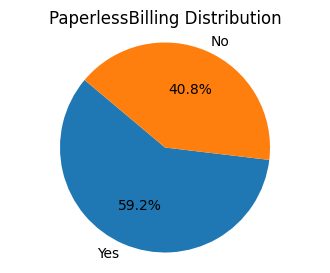

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365  33.58
Mailed check                        1612  22.89
Bank transfer (automatic)           1544  21.92
Credit card (automatic)             1522  21.61
##########################################


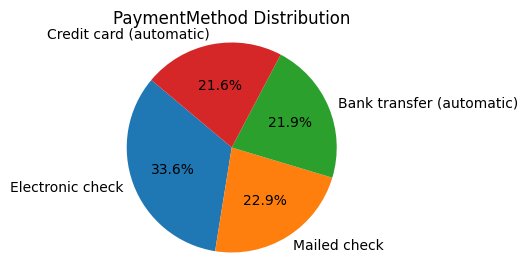

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901  83.79
1                       1142  16.21
##########################################


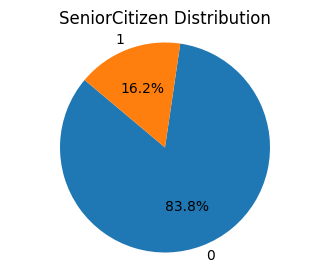

       Churn  Ratio
Churn              
0       5174  73.46
1       1869  26.54
##########################################


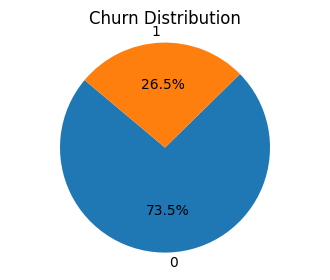

In [9]:
# Distribution of numeric and categorical variables in the data

def cat_summary(dataframe, col_name, plot=False):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary_df)
    print("##########################################")

    if plot:
        plt.figure(figsize=(4, 3))
        plt.pie(summary_df["Ratio"], labels=summary_df.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title(f"{col_name} Distribution")
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

count   7043.00
mean      32.37
std       24.56
min        0.00
5%         1.00
10%        2.00
20%        6.00
30%       12.00
40%       20.00
50%       29.00
60%       40.00
70%       50.00
80%       60.00
90%       69.00
95%       72.00
99%       72.00
max       72.00
Name: tenure, dtype: float64


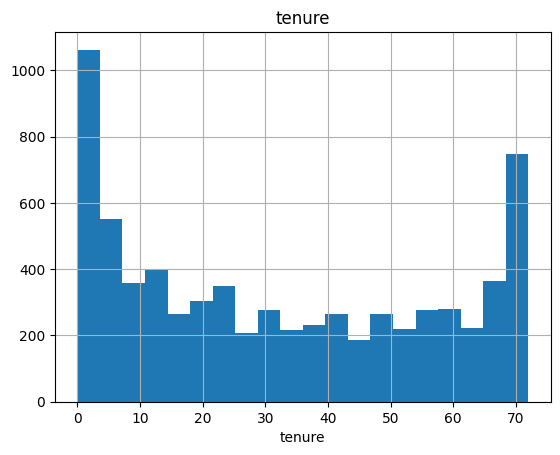

count   7043.00
mean      64.76
std       30.09
min       18.25
5%        19.65
10%       20.05
20%       25.05
30%       45.85
40%       58.83
50%       70.35
60%       79.10
70%       85.50
80%       94.25
90%      102.60
95%      107.40
99%      114.73
max      118.75
Name: MonthlyCharges, dtype: float64


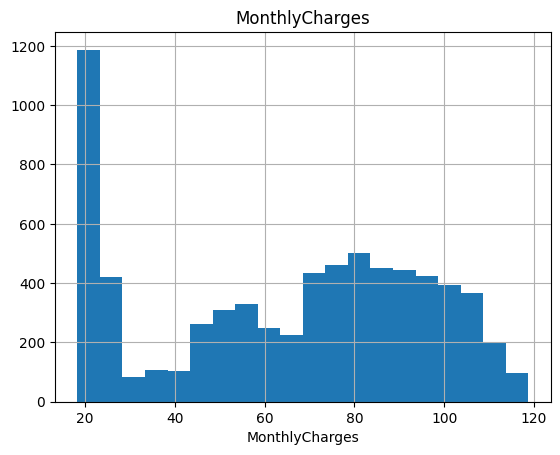

count   7032.00
mean    2283.30
std     2266.77
min       18.80
5%        49.60
10%       84.60
20%      267.07
30%      552.00
40%      944.17
50%     1397.47
60%     2048.95
70%     3141.13
80%     4475.41
90%     5976.64
95%     6923.59
99%     8039.88
max     8684.80
Name: TotalCharges, dtype: float64


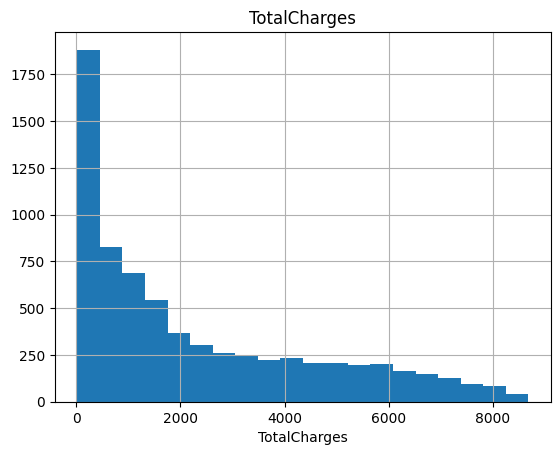

In [10]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)



for col in num_cols:
    num_summary(df, col, plot=True)

In [11]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0       37.57
1       17.98


       MonthlyCharges
Churn                
0               61.27
1               74.44


       TotalCharges
Churn              
0           2555.34
1           1531.80




In [12]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

        TARGET_MEAN
gender             
Female         0.27
Male           0.26


         TARGET_MEAN
Partner             
No              0.33
Yes             0.20


            TARGET_MEAN
Dependents             
No                 0.31
Yes                0.15


              TARGET_MEAN
PhoneService             
No                   0.25
Yes                  0.27


                  TARGET_MEAN
MultipleLines                
No                       0.25
No phone service         0.25
Yes                      0.29


                 TARGET_MEAN
InternetService             
DSL                     0.19
Fiber optic             0.42
No                      0.07


                     TARGET_MEAN
OnlineSecurity                  
No                          0.42
No internet service         0.07
Yes                         0.15


                     TARGET_MEAN
OnlineBackup                    
No                          0.40
No internet service         0.07
Yes                         0.

In [13]:
# outlier analysis
def check_skew(df, column):
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

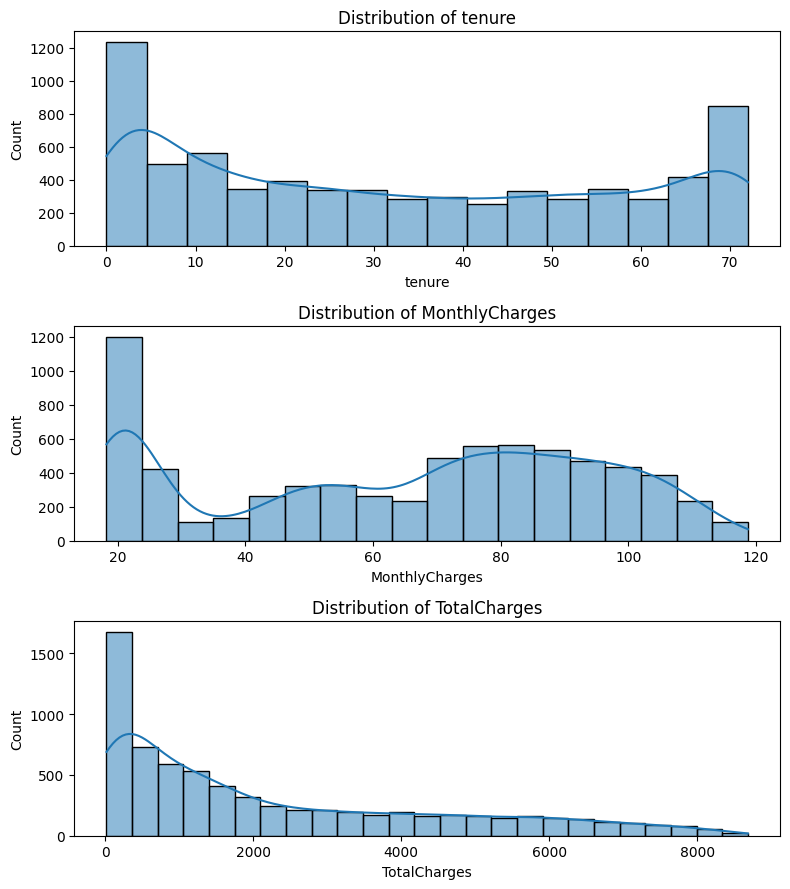

In [14]:
plt.figure(figsize=(8, 9))

plt.subplot(3, 1, 1)
check_skew(df, 'tenure')

plt.subplot(3, 1, 2)
check_skew(df, 'MonthlyCharges')

plt.subplot(3, 1, 3)
check_skew(df, 'TotalCharges')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=300)
plt.show()


In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


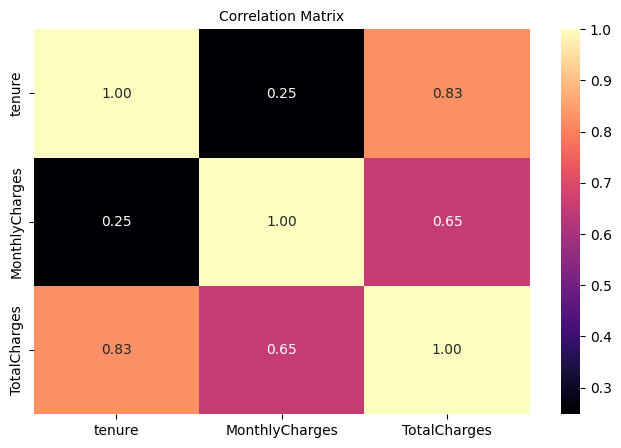

In [16]:
f, ax = plt.subplots(figsize=[8, 5])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=10)
plt.show()


In [17]:
# missing value analysis
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Feature Engineering</h1>
    </div>
</body>
</html>

In [19]:
df.loc[(df["tenure"] >= 0) & (df["tenure"] <= 12), "NEW_tenure_year"] = "0-1 Year"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "NEW_tenure_year"] = "1-2 Year"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 36), "NEW_tenure_year"] = "2-3 Year"
df.loc[(df["tenure"] > 36) & (df["tenure"] <= 48), "NEW_tenure_year"] = "3-4 Year"
df.loc[(df["tenure"] > 48) & (df["tenure"] <= 60), "NEW_tenure_year"] = "4-5 Year"
df.loc[(df["tenure"] > 60) & (df["tenure"] <= 72), "NEW_tenure_year"] = "5-6 Year"

In [20]:
# Specify customers with a 1 or 2 year contract as Engaged
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

# Young customers with a monthly contract
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

# People who do not receive any support, backup or protection
df["NEW_No_Prot"] = df.apply(lambda x: 1 if (x["TechSupport"] != "Yes") 
                                      and (x["DeviceProtection"] != "Yes") 
                                      and (x["OnlineBackup"] != "Yes") 
                                   else 0, 
                            axis=1)

# Total number of services received by the person
df['NEW_Total_Services'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)
# People who make automatic payments
df["NEW_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# People whose payment method is electronic check
df["NEW_Electro_Payment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Electronic check"] else 0)

# Average monthly payment
df["NEW_AVG_Charges"] = df["MonthlyCharges"] / (df["tenure"] + 1)

# Increase in current price compared to average price
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Fee per service
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_Total_Services'] + 1)

In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols = [col for col in cat_cols if col != "Churn"]

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Model</h1>
    </div>
</body>
</html>

In [25]:
y = df["Churn"]
X = df.drop(['Churn', 'customerID'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaler
scaler = StandardScaler()


X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])


X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

# One-Hot Encoding

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_cat_encoded = encoder.transform(X_test[cat_cols])

encoded_columns = encoder.get_feature_names_out(cat_cols)

X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=encoded_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_columns, index=X_test.index)

# Combine numeric and categorical data
X_train_processed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

print("X_train shape:", X_train_processed.shape)
print("X_test shape:", X_test_processed.shape)

X_train shape: (5634, 50)
X_test shape: (1409, 50)


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Logistic Regression</h1>
    </div>
</body>
</html>

In [28]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train_processed, y_train)

# Prediction
y_pred = logreg.predict(X_test_processed)
y_pred_proba = logreg.predict_proba(X_test_processed)[:, 1]

y_pred_train = logreg.predict(X_train_processed)
y_pred_proba_train = logreg.predict_proba(X_train_processed)[:, 1]


print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))
print("*******************************************************")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8072417465388712

Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.67      0.53      0.59      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.81      0.80      5634

*******************************************************
Test Accuracy: 0.808374733853797

Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Improvements for Imbalanced Data</h1>
    </div>
</body>
</html>

In [31]:
def manual_undersampling_dataframe(X_train_processed, y_train, random_state=42):
    """
    Manual undersampling for DataFrame
    """
    # Merge features and target into single DataFrame
    train_df = X_train_processed.copy()
    train_df['Churn'] = y_train.values  # Add y_train as column to DataFrame

    # Separate classes
    majority_class = train_df[train_df['Churn'] == 0]  # Class 0 samples
    minority_class = train_df[train_df['Churn'] == 1]  # Class 1 samples

    print(f"Before: Majority (0): {len(majority_class)}, Minority (1): {len(minority_class)}")

    # Randomly select majority samples equal to minority count
    majority_undersampled = majority_class.sample(n=len(minority_class),
                                                  random_state=random_state,
                                                  replace=False)

    # Create new balanced dataset
    balanced_df = pd.concat([minority_class, majority_undersampled])

    # Shuffle the data (very important!)
    balanced_df = balanced_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Separate features and target
    X_balanced = balanced_df.drop('Churn', axis=1)  # Features
    y_balanced = balanced_df['Churn']  # Target

    print(f"After: Majority (0): {len(majority_undersampled)}, Minority (1): {len(minority_class)}")
    print(f"Total: {len(X_balanced)}, Balance: {y_balanced.value_counts().to_dict()}")

    return X_balanced, y_balanced


# Usage
X_train_balanced, y_train_balanced = manual_undersampling_dataframe(X_train_processed, y_train)


Before: Majority (0): 4138, Minority (1): 1496
After: Majority (0): 1496, Minority (1): 1496
Total: 2992, Balance: {1: 1496, 0: 1496}


In [32]:
# Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train with BALANCED data
logreg.fit(X_train_balanced, y_train_balanced)

# Test with ORIGINAL test set (no undersampling)
y_pred_balanced = logreg.predict(X_test_processed)

# Evaluation of the results
print("=== After Manuel Undersampling  ===")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

=== After Manuel Undersampling  ===
Accuracy: 0.751596877217885

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Feature Importance</h1>
    </div>
</body>
</html>

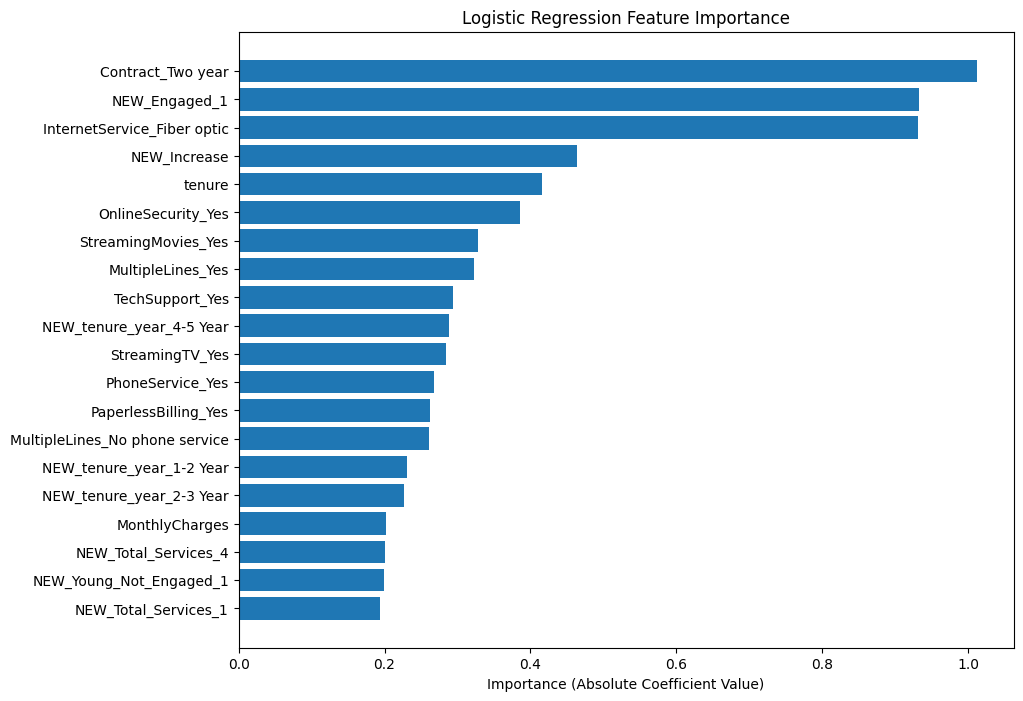

In [33]:
def plot_logreg_feature_importance(model, feature_names, top_n=20):
    """
    feature importance for Logistic Regression
    """
    importance = np.abs(model.coef_[0])
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=True).tail(top_n)

    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance (Absolute Coefficient Value)')
    plt.title('Logistic Regression Feature Importance')
    plt.show()

    return feature_importance


feature_names = X_train_processed.columns if hasattr(X_train_processed, 'columns') else range(
    X_train_processed.shape[1])
logreg_importance = plot_logreg_feature_importance(logreg, feature_names)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <div style="border: 1px solid #000000; border-radius: 5px; padding: 5px; background-color: #FFFFFF; font-family: 'Verdana', sans-serif; line-height: 1.5; word-wrap: break-word;">
        <h1 style="color: #000000; text-align: left; font-size: 18px; font-weight: bold; margin: 5px 0;">Conclusion</h1>
    </div>
</body>
</html>

Model Performance Report: Manual Undersampling Implementation
🎯 Key Achievement:
Recall for Churners (Class 1) increased dramatically from 55% to 84% – 
meaning the model now detects 84% of customers who are likely to churn, compared to only 55% before.

📊 Results Overview:

Accuracy: Decreased from 81% to 75% (expected trade-off)

Precision (Churn): Decreased from 67% to 52% (more false alarms)

F1-Score (Churn): Improved from 61% to 64% (better balance)

💡 Business Impact:
✅ Pro: 29% more churning customers are now detected – reducing potential revenue loss.
⚠️ Con: More false alarms – may increase marketing intervention costs.

📈 Conclusion:
The undersampling strategy successfully prioritizes customer retention over accuracy. 
The model is now more sensitive to churn signals, making it valuable for proactive customer retention campaigns.